### 1. confidence score 분포 확인

In [ ]:
import json
import matplotlib.pyplot as plt

rows, cols = 5, 6 
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
fig.suptitle("Distribution of current_score by File", fontsize=16)

for i in range(3):
    file_name = f'data1_response_{i}.json'
    try:
        with open(file_name, 'r') as file:
            data = json.load(file)
            current_scores = [entry["current_score"] for entry in data]
    except FileNotFoundError:
        current_scores = [] 
        
    row, col = divmod(i, cols)
    ax = axes[row, col]
    
    ax.hist(current_scores, bins=25, range=(0, 2500), color='blue', edgecolor='black')
    ax.set_title(f"File {i}", fontsize=10)
    ax.set_xlim(0, 2500)
    ax.set_ylim(0, None)
    ax.set_xlabel("Score", fontsize=8)
    ax.set_ylabel("Frequency", fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### 2. current score 변화량

In [ ]:
import json
import matplotlib.pyplot as plt

thresholds = [75, 80, 85, 90, 95, 98, 99]
threshold_proportions = {t: [] for t in thresholds}
num_files = 30

for i in range(num_files):

    prev_file_name = f'data1_response_{i}.json'
    current_file_name = f'data1_response_{i+1}.json'

    with open(prev_file_name, 'r') as prev_file, open(current_file_name, 'r') as current_file:
        prev_data = json.load(prev_file)
        current_data = json.load(current_file)
    
    prev_scores = {entry["question"]: entry["current_score"] for entry in prev_data}
    current_scores = {entry["question"]: entry["current_score"] for entry in current_data}
    
    differences = [
        current_scores[question] - prev_scores[question]
        for question in current_scores if question in prev_scores
    ]
    
    total_difference_count = len(differences)
    
    if total_difference_count > 0:
        for t in thresholds:
            high_difference_count = sum(1 for diff in differences if diff >= t)
            high_difference_ratio = high_difference_count / total_difference_count
            threshold_proportions[t].append(high_difference_ratio)
    else:
        for t in thresholds:
            threshold_proportions[t].append(0) 

plt.figure(figsize=(10, 6))
for t in thresholds:
    plt.plot(range(1, num_files + 1), threshold_proportions[t], marker='o', label=f'Threshold {t}')

plt.xlabel('File Index')
plt.ylabel('Proportion of Differences ≥ Threshold')
plt.title('Proportion of Differences at Various Thresholds')
plt.legend()
plt.grid(True)
plt.show()

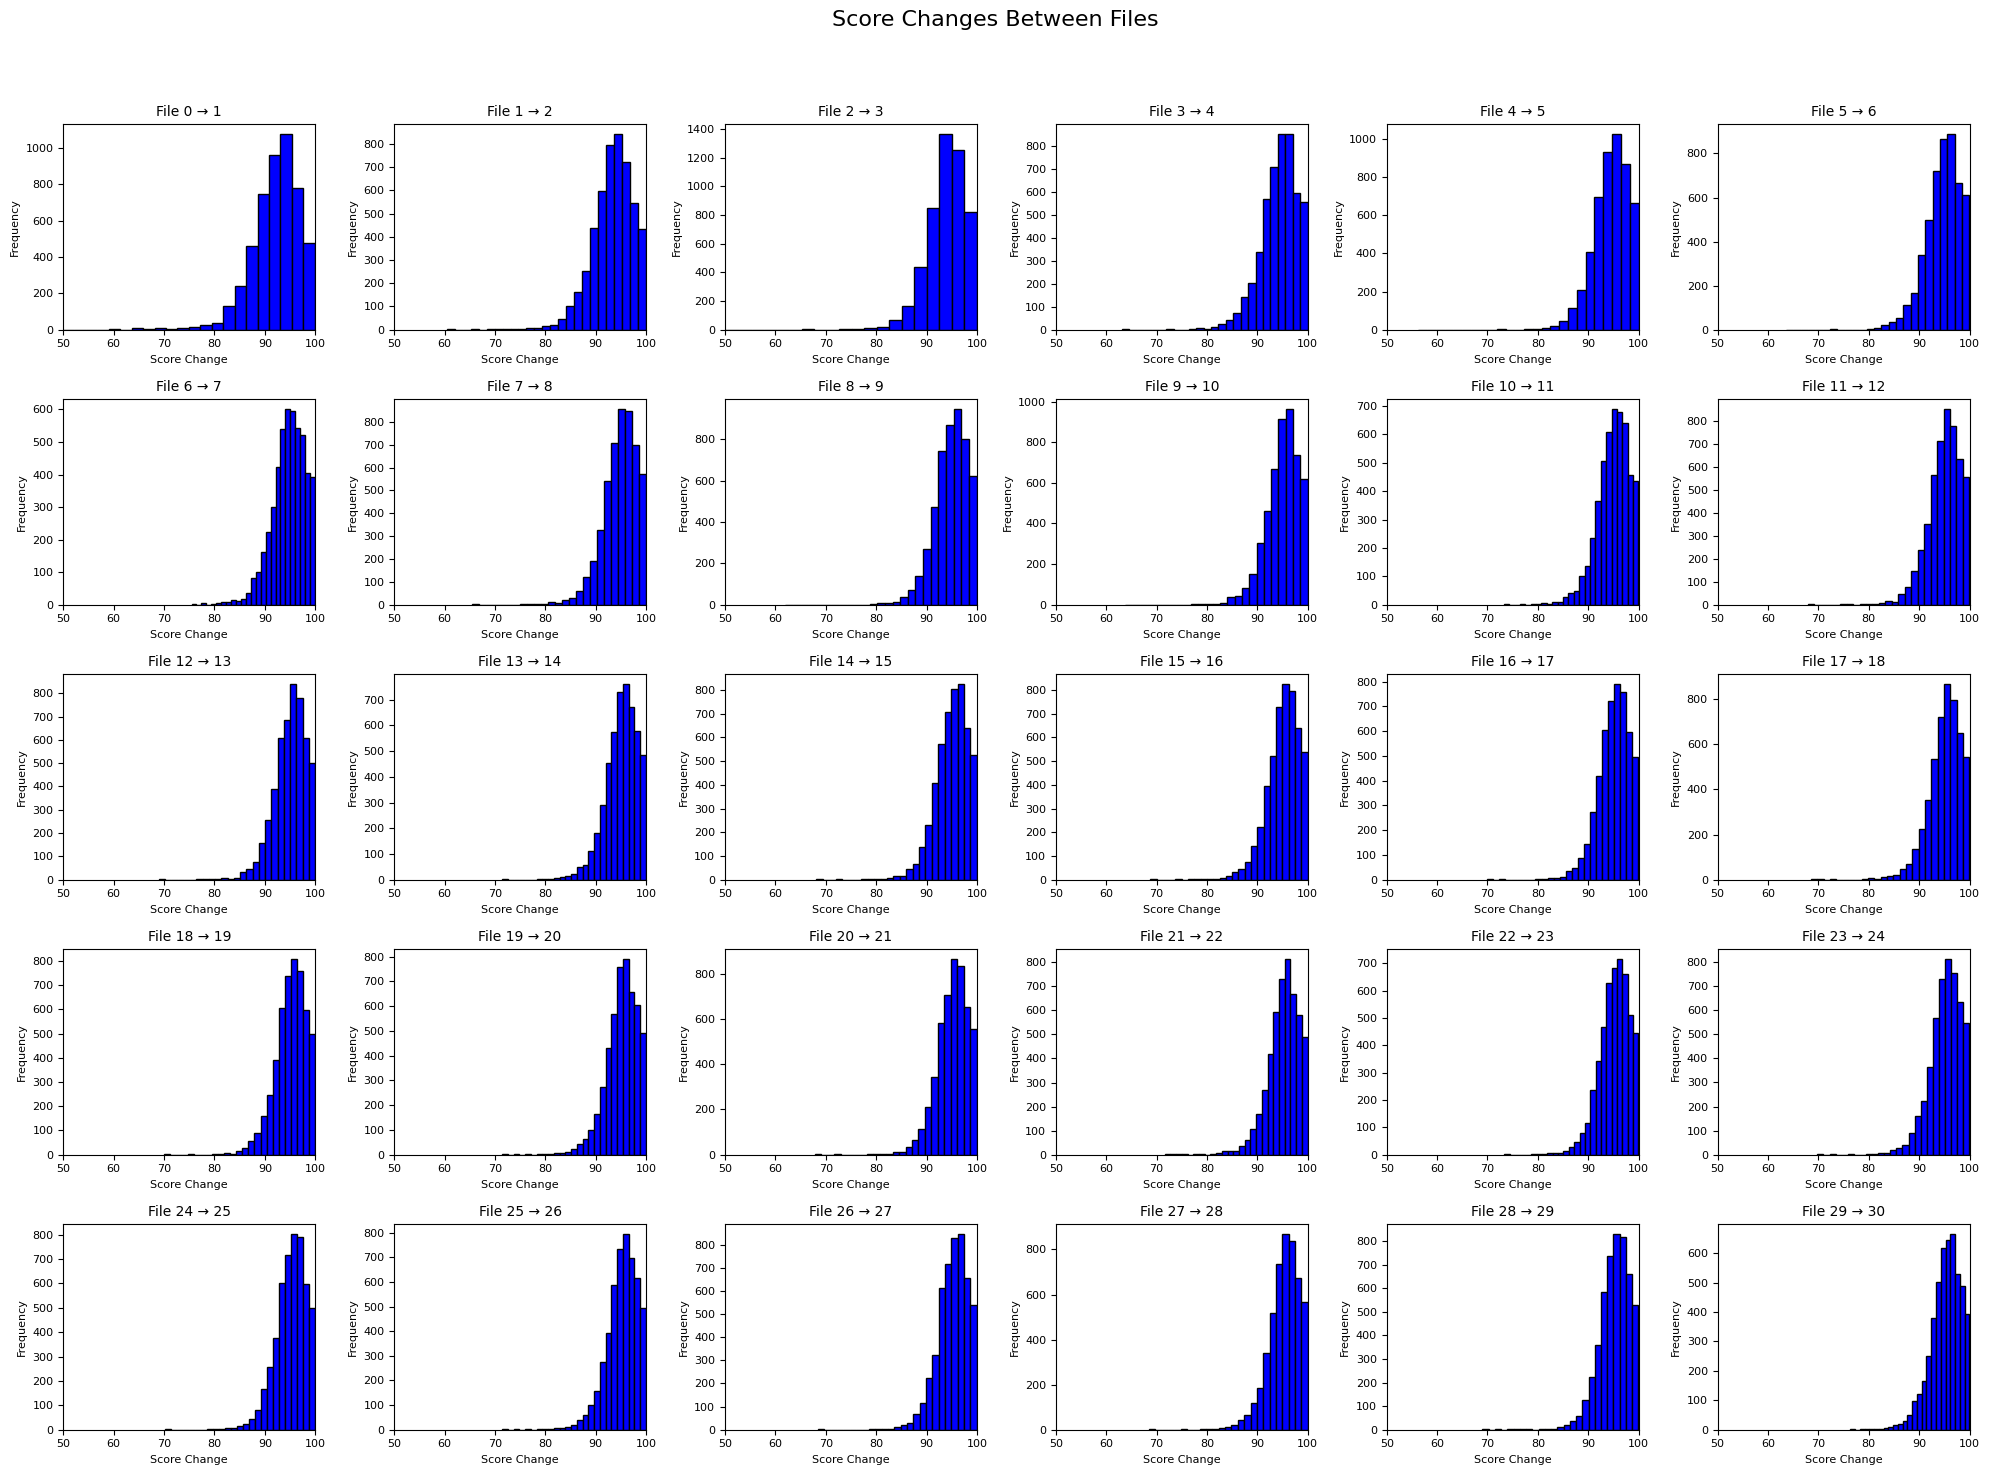

In [3]:
import json
import matplotlib.pyplot as plt

rows, cols = 5, 6 
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
fig.suptitle("Score Changes Between Files", fontsize=16)

for i in range(30):
    prev_file_name = f'data1_response_{i}.json'
    current_file_name = f'data1_response_{i+1}.json'
    
    try:
        with open(prev_file_name, 'r') as prev_file, open(current_file_name, 'r') as current_file:
            prev_data = json.load(prev_file)
            current_data = json.load(current_file)
        
        prev_scores = {entry["question"]: entry["current_score"] for entry in prev_data}
        current_scores = {entry["question"]: entry["current_score"] for entry in current_data}
        
        differences = [
            current_scores[question] - prev_scores[question]
            for question in current_scores if question in prev_scores
        ]
    except FileNotFoundError:
        differences = []
    
    row, col = divmod(i, cols)
    ax = axes[row, col]
    
    ax.hist(differences, bins=25, color='blue', edgecolor='black')
    ax.set_title(f"File {i} → {i+1}", fontsize=10)
    ax.axvline(0, color='red', linestyle='dashed', linewidth=1) 
    ax.set_xlim(50, 100)
    ax.set_xlabel("Score Change", fontsize=8)
    ax.set_ylabel("Frequency", fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
import json
import matplotlib.pyplot as plt

contradict_proportions = []
non_contradict_proportions = []
file_indices = []
num_files = 31

for i in range(num_files):
    with open(f'data1_response_{i}.json', 'r') as file:
        data = json.load(file)
            
    is_contradict_values = [entry["is_contradict"] for entry in data]

    contradict_count = is_contradict_values.count(0)
    non_contradict_count = is_contradict_values.count(1)

    total_count = len(is_contradict_values)

    contradict_proportion = contradict_count / total_count if total_count > 0 else 0
    non_contradict_proportion = non_contradict_count / total_count if total_count > 0 else 0

    file_indices.append(i)
    contradict_proportions.append(contradict_proportion)
    non_contradict_proportions.append(non_contradict_proportion)

plt.figure(figsize=(10, 6))
plt.plot(file_indices, contradict_proportions, marker='s', linestyle='--', label='Contradictions', color='blue')

plt.xlabel('File Index')
plt.ylabel('Proportion')
plt.title('Contradiction Ratio')
plt.legend()
plt.grid(False)
plt.show()


In [ ]:
import json
import matplotlib.pyplot as plt

thresholds = [75, 80, 85, 90, 95, 98, 99]
threshold_proportions = {t: [] for t in thresholds}
non_threshold_non_contradiction_ratios = {t: [] for t in thresholds}
num_files = 23

for i in range(num_files):
    prev_file_name = f'data1_response_{i}.json'
    current_file_name = f'data1_response_{i+1}.json'
    
    with open(prev_file_name, 'r') as prev_file, open(current_file_name, 'r') as current_file:
        prev_data = json.load(prev_file)
        current_data = json.load(current_file)
    
    prev_scores = {entry["question"]: entry["current_score"] for entry in prev_data}
    current_scores = {entry["question"]: entry["current_score"] for entry in current_data}
    current_contradictions = {entry["question"]: entry["is_contradict"] for entry in current_data}
    
    differences = {
        question: current_scores[question] - prev_scores[question]
        for question in current_scores if question in prev_scores
    }
    
    total_difference_count = len(differences)
    
    if total_difference_count > 0:
        for t in thresholds:
            high_difference_count = sum(1 for diff in differences.values() if diff >= t)
            high_difference_ratio = high_difference_count / total_difference_count
            threshold_proportions[t].append(high_difference_ratio)
            
            # Threshold를 넘지 못한 경우 찾기
            non_threshold_questions = [q for q, diff in differences.items() if diff < t]
            # print(f'threshold:{t}, count: {len(non_threshold_questions)}')
            
            if non_threshold_questions:
                non_contradiction_count = sum(1 for q in non_threshold_questions if current_contradictions[q] == 1)
                non_threshold_non_contradiction_ratios[t].append(non_contradiction_count / len(non_threshold_questions))
            else:
                non_threshold_non_contradiction_ratios[t].append(0)
    else:
        for t in thresholds:
            threshold_proportions[t].append(0)
            non_threshold_non_contradiction_ratios[t].append(0)

# 시각화
plt.figure(figsize=(10, 6))
for t in thresholds:
    plt.plot(range(1, num_files + 1), non_threshold_non_contradiction_ratios[t], marker='o', linestyle='-', label=f'T={t}')

plt.xlabel('File Index')
plt.ylabel('Proportion of Non-Contradictions in Non-Threshold Cases')
plt.title('Non-Contradiction Ratio for Non-Threshold Cases Over Time')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.show()

In [ ]:
import json
import matplotlib.pyplot as plt

thresholds = [75, 80, 85, 90, 95, 98, 99]
threshold_proportions = {t: [] for t in thresholds}
threshold_non_contradiction_ratios = {t: [] for t in thresholds}
num_files = 30

for i in range(num_files):
    prev_file_name = f'data1_response_{i}.json'
    current_file_name = f'data1_response_{i+1}.json'
    
    with open(prev_file_name, 'r') as prev_file, open(current_file_name, 'r') as current_file:
        prev_data = json.load(prev_file)
        current_data = json.load(current_file)
    
    prev_scores = {entry["question"]: entry["current_score"] for entry in prev_data}
    current_scores = {entry["question"]: entry["current_score"] for entry in current_data}
    current_contradictions = {entry["question"]: entry["is_contradict"] for entry in current_data}
    
    differences = {
        question: current_scores[question] - prev_scores[question]
        for question in current_scores if question in prev_scores
    }
    
    total_difference_count = len(differences)
    
    if total_difference_count > 0:
        for t in thresholds:
            high_difference_count = sum(1 for diff in differences.values() if diff >= t)
            high_difference_ratio = high_difference_count / total_difference_count
            threshold_proportions[t].append(high_difference_ratio)
            
            threshold_questions = [q for q, diff in differences.items() if diff > t]
            
            if threshold_questions:
                non_contradiction_count = sum(1 for q in threshold_questions if current_contradictions[q] == 1)
                threshold_non_contradiction_ratios[t].append(non_contradiction_count / len(threshold_questions))
            else:
                threshold_non_contradiction_ratios[t].append(0)
    else:
        for t in thresholds:
            threshold_proportions[t].append(0)
            threshold_non_contradiction_ratios[t].append(0)

# 시각화
plt.figure(figsize=(10, 6))
for t in thresholds:
    plt.plot(range(1, num_files + 1), threshold_non_contradiction_ratios[t], marker='o', linestyle='-', label=f'T={t}')

plt.xlabel('File Index')
plt.ylabel('Proportion of Non-Contradictions in Non-Threshold Cases')
plt.title('Non-Contradiction Ratio for Non-Threshold Cases Over Time')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.show()

### Convert to cache data

In [2]:
import json

all_scores = []
question_dict = {}

for iteration in range(1): 
    file_path = f"data1_response_{iteration}.json" 

    try:
        with open(file_path, "r", encoding="utf-8") as f:
            data = json.load(f)

        for entry in data:
            question = entry["question"]
            current_score = entry["current_score"]
            response_text = entry["response_text"]
            is_contradict = entry["is_contradict"]

            if iteration == 0:
                is_contradict = 1 if is_contradict is True else 0  

            all_scores.append(current_score)

            if question not in question_dict:
                question_dict[question] = {}

            question_dict[question][iteration] = {
                "response_text": response_text,
                "is_contradict": is_contradict,
                "current_score": current_score,
            }

    except FileNotFoundError:
        print(f"⚠ 파일 {file_path}을(를) 찾을 수 없습니다. 건너뜁니다.")

all_scores.sort()

with open("scores_0.json", "w", encoding="utf-8") as f:
    json.dump(all_scores, f, indent=4)

with open("question_dict_0.json", "w", encoding="utf-8") as f:
    json.dump(question_dict, f, indent=4, ensure_ascii=False)

print("데이터 저장 완료: sorted_scores.json, question_dict.json")


데이터 저장 완료: sorted_scores.json, question_dict.json


In [6]:
## check randomness
import json
import random

with open("question_dict_5.json", "r", encoding="utf-8") as f:
    question_dict = json.load(f)

questions = list(question_dict.keys())
random.shuffle(questions)

train_questions = set(questions[:1])
val_questions = set(questions[1:])

train_dict = {q: question_dict[q] for q in train_questions}
val_dict = {q: question_dict[q] for q in val_questions}

with open("train_questions.json", "w", encoding="utf-8") as train_file:
    json.dump(train_dict, train_file, ensure_ascii=False, indent=4)

with open("val_questions.json", "w", encoding="utf-8") as val_file:
    json.dump(val_dict, val_file, ensure_ascii=False, indent=4)

print("파일 저장 완료!")


파일 저장 완료!


In [22]:
import json
from scipy.stats import beta

with open("cross_validation_results/val_dict_trial_1.json", "r", encoding="utf-8") as f:
    question_dict = json.load(f)
def u_binom(k, n, alpha):
    return beta.ppf(1 - alpha, k + 1, n - k) if n > 0 else 1.0

threshold = 2918.3181518377614

count_questions = 0
cnt = 0
    
for question, iterations in question_dict.items():
    found_above_threshold = False
    
    for iteration, data in iterations.items():
        if data["current_score"] >= threshold:
            found_above_threshold = True
            if iteration == 0: 
                if data["is_contradict"] == 1:
                    cnt += 1
            else:  
                if data["is_contradict"] == 0:
                    cnt += 1
            break
    if found_above_threshold:
        count_questions += 1

print(f"Score가 {threshold} 이상인 이력이 하나라도 있는 question의 수: {count_questions}")
print(f"cnt: {cnt}")

ub = u_binom(cnt, count_questions, 0.05)
print(f"{ub/5000}")


Score가 2918.3181518377614 이상인 이력이 하나라도 있는 question의 수: 582
cnt: 180
6.846500381850484e-05


In [23]:
import json
from scipy.stats import beta

# Validation Data 로드
with open("cross_validation_results/val_dict_trial_1.json", "r", encoding="utf-8") as f:
    question_dict = json.load(f)

# Binomial Upper Bound Function
def u_binom(k, n, alpha):
    return beta.ppf(1 - alpha, k + 1, n - k) if n > 0 else 1.0

threshold = 2911.710556613059

count_questions = 0
cnt = 0

for question, iterations in question_dict.items():
    found_above_threshold = False
    
    for iteration, data in iterations.items():
        if data["current_score"] >= threshold:
            found_above_threshold = True
            if iteration == 0:  
                if data["is_contradict"] == 1:
                    cnt += 1
            else:  
                if data["is_contradict"] == 0:
                    cnt += 1
            break
    if found_above_threshold:
        count_questions += 1

print(f"Score가 {threshold} 이상인 이력이 있는 question 수: {count_questions}")
print(f"Contradiction Count (cnt): {cnt}")

ub = u_binom(cnt, count_questions, 0.05)
print(f"Expected error rate: {ub/1000:.6f}")

observed_ratio = cnt / count_questions if count_questions > 0 else 0
print(f"FDR-E: {observed_ratio:.6f}")


Score가 2911.710556613059 이상인 이력이 있는 question 수: 607
Contradiction Count (cnt): 192
Expected error rate: 0.000349
FDR-E: 0.316310
